In [2]:
import numpy as np
from scipy.integrate import quad
import scipy.constants as const
import matplotlib.pyplot as plt

In [3]:
# Values
kpc = 3.086e+19
M_sol = 1.9884e30
L = 50 * kpc
V_c = 240e3
M = .01 * M_sol

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992 * M_sol / (kpc)**3
n = 0.43

G = const.G
g = 1
c = const.c

In [30]:
# Constant multiplier:
m =  32 * L / ( V_c**2 * 86400**2 * 0.00273973**2 * M)
#def m(t):
#    return 32 * L / (t**4 * V_c**2 * 86400**2 * 0.00273973**2)

# Inside last exp
k = 16 * G * M * L / (c**2 * V_c**2 * 86400**2)

#  Einstei Radius
def R_e(x):
    return 4 * G * M * L * x * (1 - x) / c**2

# Density profile
def rho(x):
    return rho_0 * np.exp(-(L * x / R_h)**(1/n))

# Exponent
def exp(x, t):
    return np.exp(-(k * x * (1 - x) / t**2))

# Integrand
def Integrand(x, t):
    return rho(x) * R_e(x)**2 * exp(x, t) / t**4

In [31]:
t_values = np.arange(2.5, 250, 2.5)

diff_rates = []
errors = []
results = []

for t in t_values:
    result, error = quad(Integrand, R_0/L, 1, args=(t,))
    
    diff_rat = m * result 
    results.append(diff_rat)
    
results = np.array(results)


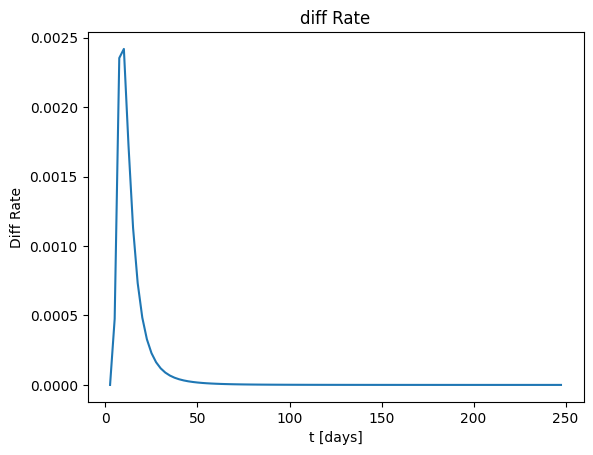

In [32]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(t_values, results)

'''
# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')
'''

# Set labels
ax.set_xlabel('t [days]')
ax.set_ylabel('Diff Rate')
ax.set_title('diff Rate')

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()

In [8]:
print(4 * np.pi * G * 0.1 * M_sol * 1e9 * 9 * (-1/4 + np.exp(-2/3))/ (c**2 * kpc))

1.425504260358129e-07
